# Preprocessing
---

## 데이터 불러오기

In [ ]:
!pwd

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np
import missingno as msno

In [81]:
workspace_dir = os.getenv('HOME') + '/workspace/aiffel-exploration-workspace/E10_kaggle/AIFFEL_1st_Hackathon'
data_dir = workspace_dir + '/1.data'
code_dir = workspace_dir + '/2.code'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')
sample_submission_data_path = join(data_dir,'sample_submission.csv')
item_categories_data_path = join(data_dir, 'item_categories.csv')
items_data_path = join(data_dir, 'items.csv')
shops_data_path = join(data_dir, 'shops.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
sample_submission = pd.read_csv(sample_submission_data_path)
item_categories = pd.read_csv(item_categories_data_path)
items = pd.read_csv(items_data_path)
shops = pd.read_csv(shops_data_path)

print('train data dim : {}'.format(train.shape)) # 훈련 데이터 형태
print('test data dim : {}'.format(test.shape))    # 시험 데이터 형태
print('submission dim : {}'.format(sample_submission.shape)) # 제출 샘플 데이터 형태
print('item_categories data dim : {}'.format(item_categories.shape)) # 아이템 카데고리 데이터 형태
print('items data dim : {}'.format(items.shape)) # 아이템 데이터 형태
print('shops data dim : {}'.format(shops.shape)) # 상점 데이터 형태

train data dim : (2935849, 6)
test data dim : (214200, 3)
submission dim : (214200, 2)
item_categories data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)


In [3]:
print(train.columns)
print(test.columns)
print(sample_submission.columns)
print(item_categories.columns)
print(items.columns)
print(shops.columns)

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
Index(['ID', 'shop_id', 'item_id'], dtype='object')
Index(['ID', 'item_cnt_month'], dtype='object')
Index(['item_category_name', 'item_category_id'], dtype='object')
Index(['item_name', 'item_id', 'item_category_id'], dtype='object')
Index(['shop_name', 'shop_id'], dtype='object')


## EDA 1) 데이터 살펴보기
---
데이터 의존도가 낮은 순으로 탐색

### item_categories

- item_categories.csv의 데이터 프레임
- name of item category

In [4]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [5]:
item_categories.tail(10)

,item_category_name,item_category_id
74,Программы - MAC (Цифра),74
75,Программы - Для дома и офиса,75
76,Программы - Для дома и офиса (Цифра),76
77,Программы - Обучающие,77
78,Программы - Обучающие (Цифра),78
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82
83,Элементы питания,83


- 러시아어로는 데이터를 이해하는 것에 어려움인 있어 item_category_name을 영어로 번역한 item_category_name_eng column을 가지는 문서 파일을 불러와 `item_categories_eng`로 저장하였다.

In [6]:
item_categories_with_eng_name_data_path = join(data_dir, 'item_category_with_eng_name.csv')
item_categories_eng = pd.read_csv(item_categories_with_eng_name_data_path)

In [7]:
item_categories_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   item_category_id        84 non-null     int64 
 1   item_category_name      84 non-null     object
 2   item_category_name_eng  84 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [8]:
item_categories_eng.tail(10)

,item_category_id,item_category_name,item_category_name_eng
74,74,Программы - MAC (Цифра),Programs - MAC (Digital)
75,75,Программы - Для дома и офиса,Programs - For Home and Office
76,76,Программы - Для дома и офиса (Цифра),Programs - For Home and Office (Digital)
77,77,Программы - Обучающие,Programs - Educational
78,78,Программы - Обучающие (Цифра),Programs - Educational (Digital)
79,79,Служебные,Service
80,80,Служебные - Билеты,Service - Tickets
81,81,Чистые носители (шпиль),Blank media (spire)
82,82,Чистые носители (штучные),Blank media (piece)
83,83,Элементы питания,Batteries


- 결측치 확인

In [9]:
np.sum(pd.isnull(item_categories_eng))

item_category_id          0
item_category_name        0
item_category_name_eng    0
dtype: int64

- `get_item_category_name(id, lang="ru")`

In [10]:
def get_item_category_name(id, lang="ru"):
    item = item_categories_eng[item_categories_eng['item_category_id'] == id].reset_index(drop=True)
    if len(item) <= 0 : print(f'[get_item_category_name] Invalid id {id}')
    elif lang == "ru": return item.loc[0]['item_category_name']
    elif lang == "eng": return item.loc[0]['item_category_name_eng']

In [11]:
get_item_category_name(83), get_item_category_name(83, 'eng'), get_item_category_name(84)

[get_item_category_name] Invalid id 84


('Элементы питания', 'Batteries', None)

### items

- items.csv의 데이터 프레임
- 판매 품목의 id, name, category(FK, item_categories.item_category_id)에 관한 정보를 가지고 있다.

In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [13]:
items.tail(10)

,item_name,item_id,item_category_id
22160,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),22160,40
22161,ЯРОСЛАВ. ТЫСЯЧУ ЛЕТ НАЗАД э (BD),22161,37
22162,ЯРОСТЬ,22162,40
22163,ЯРОСТЬ ( регион),22163,40
22164,ЯРОСТЬ (BD),22164,37
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62
22169,Яйцо дракона (Игра престолов),22169,69


- 결측치 확인

In [14]:
np.sum(pd.isnull(items))

item_name           0
item_id             0
item_category_id    0
dtype: int64

- `get_item_name(id)`

In [15]:
def get_item_name(id, lang="ru"):
    item = items[items['item_id'] == id].reset_index(drop=True)
    return item.loc[0]['item_name'] if len(item) > 0 else print(f'[get_item_name] Invalid id {id}')

- get_item_category_id(id):

In [16]:
def get_item_category_id(id):
    item = items[items['item_id'] == id].reset_index(drop=True)
    return item.loc[0]['item_category_id'] if len(item) > 0 else print(f'[get_item_name] Invalid id {id}')

In [17]:
get_item_name(22169), get_item_name(22170)

[get_item_name] Invalid id 22170


('Яйцо дракона (Игра престолов)', None)

### shops

- shops.csv의 데이터 프레임
- 가게의 id, name에 관한 정보를 가지고 있다.

In [18]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [19]:
shops.tail(10)

,shop_name,shop_id
50,"Тюмень ТЦ ""Гудвин""",50
51,"Тюмень ТЦ ""Зеленый Берег""",51
52,"Уфа ТК ""Центральный""",52
53,"Уфа ТЦ ""Семья"" 2",53
54,"Химки ТЦ ""Мега""",54
55,Цифровой склад 1С-Онлайн,55
56,"Чехов ТРЦ ""Карнавал""",56
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58
59,"Ярославль ТЦ ""Альтаир""",59


- 결측치 확인

In [20]:
np.sum(pd.isnull(shops))

shop_name    0
shop_id      0
dtype: int64

### train

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [31]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,20130102,0,59,22154,999.00,1.0
1,20130103,0,25,2552,899.00,1.0
2,20130105,0,25,2552,899.00,-1.0
3,20130106,0,25,2554,1709.05,1.0
4,20130115,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,20151010,33,25,7409,299.00,1.0
2935845,20151009,33,25,7460,299.00,1.0
2935846,20151014,33,25,7459,349.00,1.0
2935847,20151022,33,25,7440,299.00,1.0


- date가 '일/월/년' 순이기 때문에 sort를 하거나 할 때 불편한 사항이 있다. date의 format을 '년월일'로 변경한다.

In [22]:
def change_date(date):
    splited = date.split('.')
    return f'{splited[2]}{splited[1]}{splited[0]}'
train['date'] = train['date'].apply(change_date).astype(str)

In [23]:
# mean 하지 말것, 터짐
train.agg(['count','min','max'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2935849,2935849,2935849,2935849.0,2935849.0
min,20130101,0,0,0,-1.0,-22.0
max,20151031,33,59,22169,307980.0,2169.0


- 데이터 유효성 확인
    1. train.shop_id는 shop.shop_id에 존재해야 한다.
    2. train.item_id는 shop.item_id에 존재해야 한다.
    3. date와 date_block_num가 알맞게 매치되어야 한다.

In [24]:
# train.shop_id는 shop.shop_id에 존재해야 한다.
train_shop = train['shop_id'].unique()
shops_shop = shops['shop_id'].unique()

is_shop_exist = lambda x : x in shops_shop
validation_shop_id_res = np.array([ is_shop_exist(shop) for shop in train_shop ])
validation_shop_id_res.all()

True

In [25]:
test = np.array([ is_shop_exist(shop) for shop in [70, 80] ])
test.all()

False

In [27]:
# train.item_id는 shop.item_id에 존재해야 한다.
train_item = train['item_id'].unique()
items_item = items['item_id'].unique()

is_item_exist = lambda x : x in items_item
validation_item_id_res = np.array([ is_item_exist(item) for item in train_item ])
validation_item_id_res.all()

True

In [ ]:
# date와 date_block_num가 알맞게 매치되어야 한다.

In [52]:
year = ['2013', '2014', '2015']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
date_block_list = [ f'{y}{m}' for y in year for m in month ]
date_block_num_dict = { n : i for i, n in enumerate(date_block_list)}
date_block_num_dict

{'201301': 0,
 '201302': 1,
 '201303': 2,
 '201304': 3,
 '201305': 4,
 '201306': 5,
 '201307': 6,
 '201308': 7,
 '201309': 8,
 '201310': 9,
 '201311': 10,
 '201312': 11,
 '201401': 12,
 '201402': 13,
 '201403': 14,
 '201404': 15,
 '201405': 16,
 '201406': 17,
 '201407': 18,
 '201408': 19,
 '201409': 20,
 '201410': 21,
 '201411': 22,
 '201412': 23,
 '201501': 24,
 '201502': 25,
 '201503': 26,
 '201504': 27,
 '201505': 28,
 '201506': 29,
 '201507': 30,
 '201508': 31,
 '201509': 32,
 '201510': 33,
 '201511': 34,
 '201512': 35}

In [77]:
train_date = train.loc[:, 'date':'date_block_num'].values
is_correct_block_num = lambda d, dn: True if date_block_num_dict[d] == dn else False
res = np.array([ is_correct_block_num(d[:6], dn) for d, dn in train_date ])
res.all()

True

- 확인 결과, train의 item_id, shop_id, date_block_num은 유효한 데이터이다.

### test

- test.csv의 데이터 프레임
- 테스트에 사용될 데이터로, ID, shop_id, item_id를 column으로 가지고 있다.

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


### sample_submission

- sample_submission.csv의 데이터 프레임
- 테스트 결과를 저장할 csv의 파일을 옳바른 포맷을 정의하고 있다.
- ID는 test.ID와 같은 값을 가진다.
- item_cnt_month는 train date 이후 한달(2015/11)간 특정 가게(shop_id)에서 특정 아이템(item_id)가 얼마나 판매될지를 예측한 값이다.

In [85]:
sample_submission.tail()

,ID,item_cnt_month
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5
214199,214199,0.5


## EDA 2) 이상치 탐색
---

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

### train

#### train.item_price

In [115]:
price_mean = train['item_price'].mean()
price_max = train['item_price'].max() + 100
price_min = train['item_price'].min() - 100

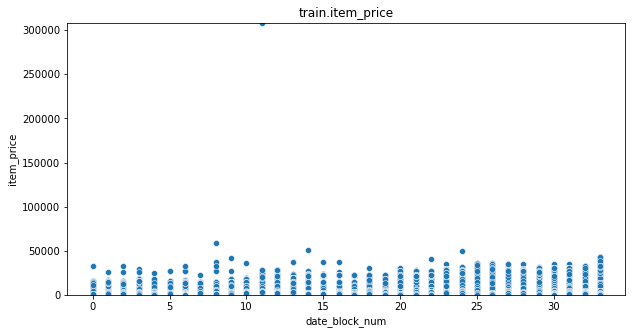

In [117]:
fig, ax1 = plt.subplots(1, figsize=(10,5))
sns.scatterplot(data=train , x='date_block_num', y='item_price', palette="ch:r=-.2,d=.3_r", ax=ax1)
ax1.set_title('train.item_price')
ax1.set_ylim(top=price_max, bottom=price_min)
plt.show()

- 그래프상에서 너무 큰 값이 발견 되었다. 이 값에 대해 자세히 알아보자.

In [122]:
train[train['item_price'] > 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [121]:
print(f'item name : {get_item_name(6066)}')
print(f'item catetgory : {get_item_category_name(get_item_category_id(6066), "eng")}')

item name : Radmin 3  - 522 лиц.
item catetgory : Programs - For Home and Office


- 발견된 데이터가 이상치인지 특이치인지 확인하기 위하여 제품의 정보를 인터넷상으로 찾아 보았다.
- 데이터 제공자인 1C의 제품 판매 홈페이지(https://online.1c.ru/)에서 아래와 같은 제품을 확인할 수 있었다. 
<img src="./assets/note_01_price_outlier.png" width="80%">


- 해당 데이터는 Radmin이라는 운영체제로 인터넷상에서는 최대 25개의 라이센스를 묶음으로 판매하고 있다. item_name 정보를 기반으로 추리하면, 문제의 데이터 ***Radmin 3  - 522 лиц.***은 Radmin 라이센스 522개를 묶음으로 판매한 것으로 생각할 수 있다. 관공서나 기업에서 단체구매를 했다고 생각할 수 있을 것이다.
- 하지만 금액적으로 살펴 보았을 때, 한개의 라이센스의 가격이 1250이기 때문에 522개를 판매했다는 가정이 맞을려면 652500(1250\*522)가 되어야 한다. 데이터상의 값은 307980보다 월등히 높은 값을 보인다.
- 실생활에서 생각을해 보면 대량구매를 할 때, 할인을 받는 경우가 왕왕있다. 이점을 고려하면 652500 * 0.472 = 307980이므로 52.8%를 할인 받았다고 볼 수 있다.
- 아무리 대량구매를 했다고하여도 50% 넘는 금액을 할인받았다고는 보기 힘들다. 

 #### train.item_cnt_day
- 너무 큰 데이터 1. ['item_id']==11373
    - 가격 동일 카테고리의 제품들에 비해 가격이 너무 저렴하고 판매량이 높다.
    - 배송이 이렇게 많다는거면 할인 이벤트라고 볼 수 있을 것 같다.
    - 일반적이지 않은 데이터이므로 삭제
- 너무 큰 데이터 2. 100 인거는 T셔츠니까 살리기

In [ ]:
⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

In [ ]:
삭제 coloumn : date, price
date_block_num을 34로 넣어서 돌리기

x = date_block_num, shop_id, item_id
y = item_cnt_day

